# Task 5 : View the spectral distribution.

In [1]:
import os,json,sys,logging
from numpy import nan
sys.path.append("./share")
sys.path.append("./common")
import pandas as pd
import json,logging
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()
from SHSample import CSHSample
from IoTSample import CIoTSample
from IoTDatabase import CIoTDbFeatures,CIoTDbSample,import_sample
from IoTScore import CIoTScore,CIoTScoreTest,Create_Score_Sample,Create_Normal_Sample
from IoTCommon import CIoTCommon
from sklearn.metrics import jaccard_score
from scipy.stats import skew, kurtosis
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(suppress=True)

# Selected Spectral distribution.

In [6]:
def show_spectrum(attack):
    df_spectrum = pd.read_csv("./IIoTSet/result/spectrums-distribution.csv")
    df_spectrum = df_spectrum[df_spectrum['attack'] == attack].sort_values(by='group').reset_index(drop=True)
    df_coap = df_spectrum[df_spectrum['kind'] == "COAP"].reset_index(drop=True)
    df_sspe = df_spectrum[df_spectrum['kind'] == "SSPE"].reset_index(drop=True)

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    #Display histograms of COAP and SSPE.
    df_coap['value'].hist(bins=200,ax=axes[0,0])
    df_sspe['value'].hist(bins=200,ax=axes[0,1])
    
    #Normalize COAP and SSPE.
    df_coap['value'] = (df_coap['value'] - df_coap['value'].mean()) / df_coap['value'].std()
    df_sspe['value'] = (df_sspe['value'] - df_sspe['value'].mean()) / df_sspe['value'].std()

    #Display the trend chart of the last 1000 spectrum values.
    df_coap['value'].tail(1000).plot(ax=axes[1,0])
    df_sspe['value'].tail(1000).plot(ax=axes[1,1])
    
    plt.show()

Spectral distribution： Port Scanning attack


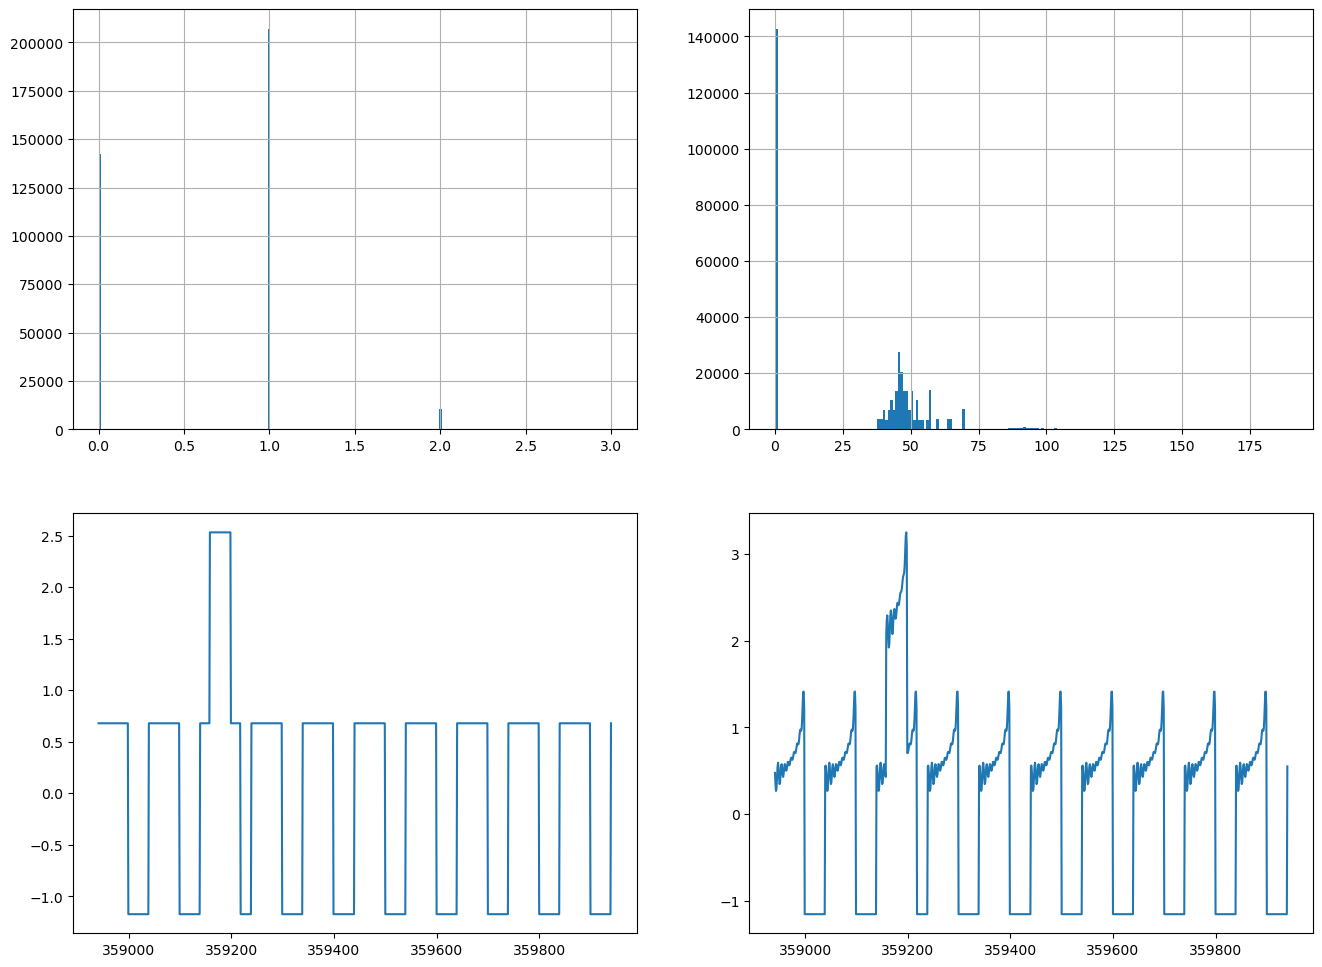

Spectral distribution： Vulnerability scanner attack


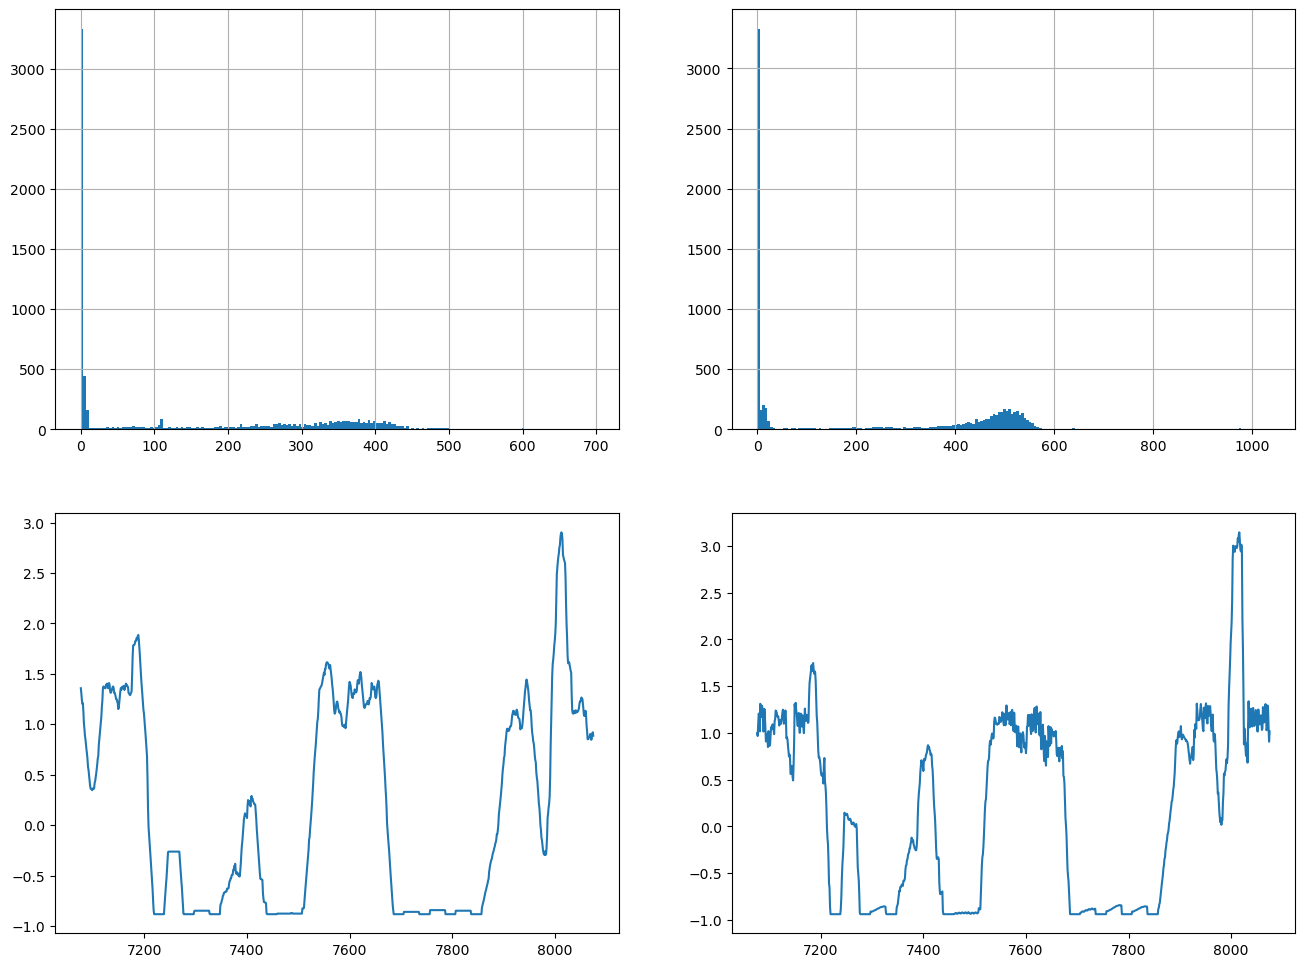

Spectral distribution： Password attacks


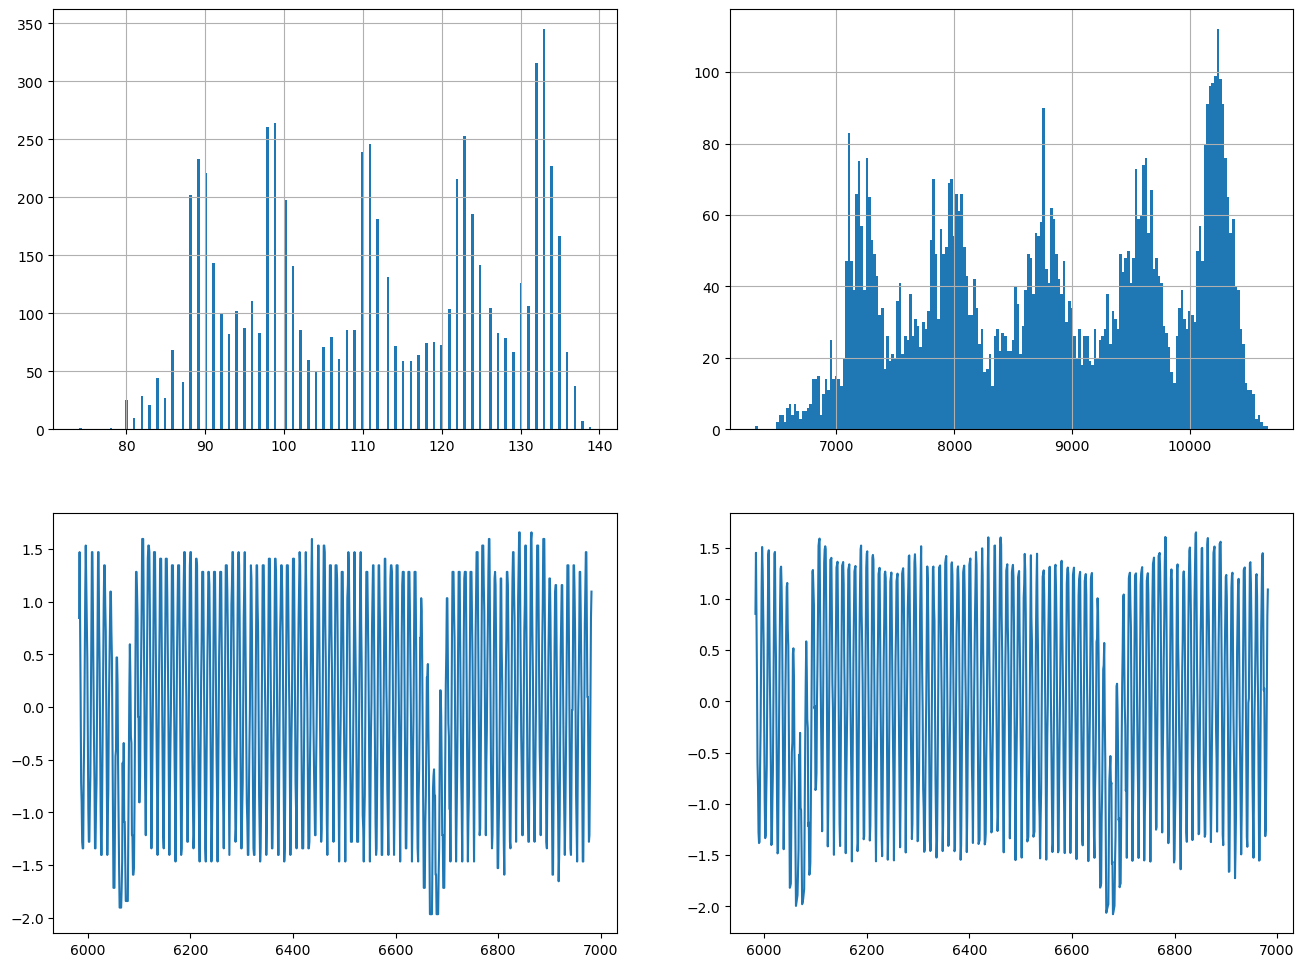

Spectral distribution： Uploading attack


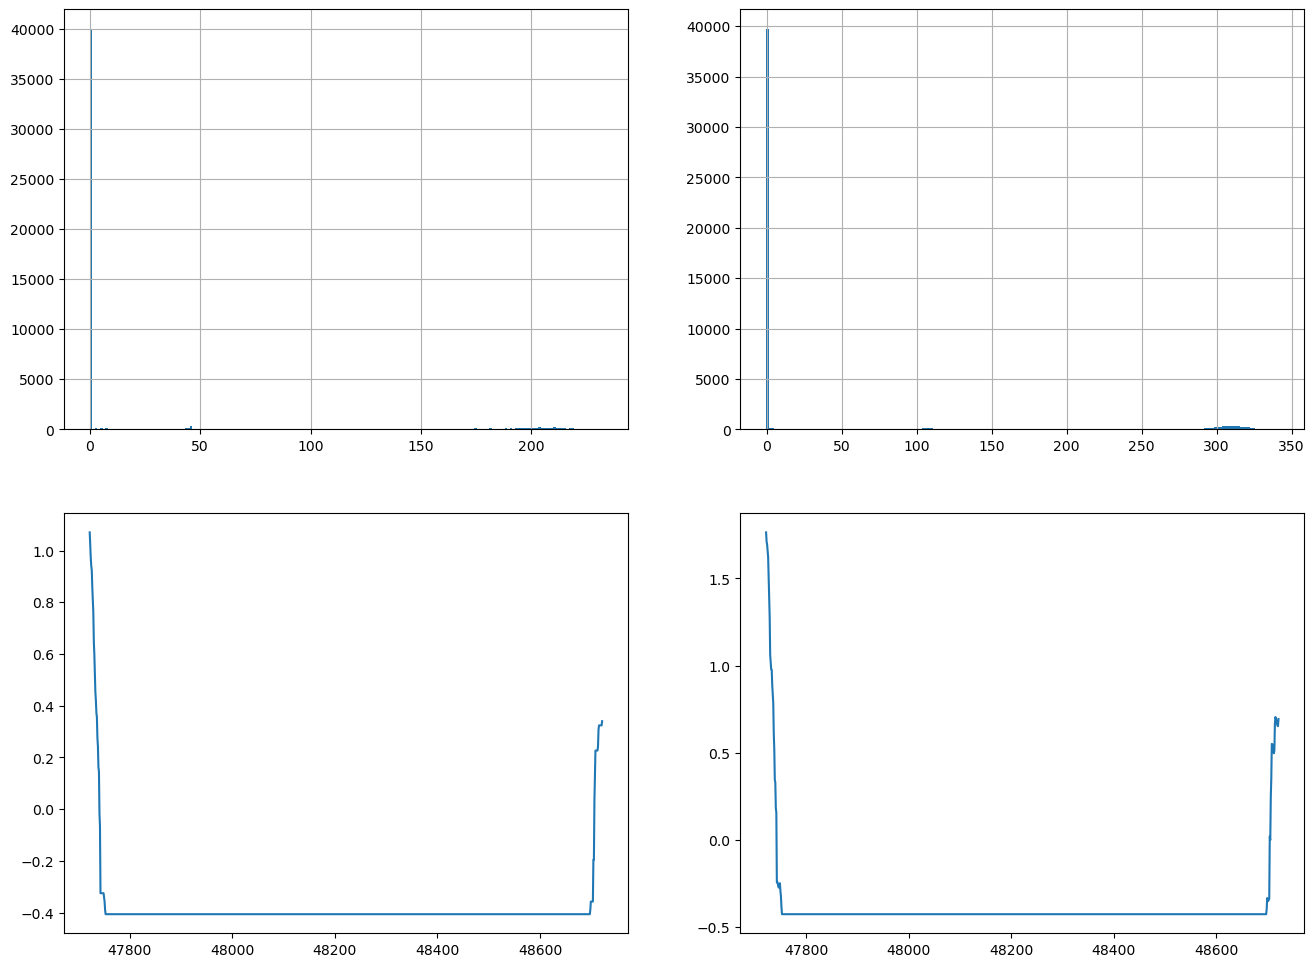

Spectral distribution： DDoS UDP Flood Attacks


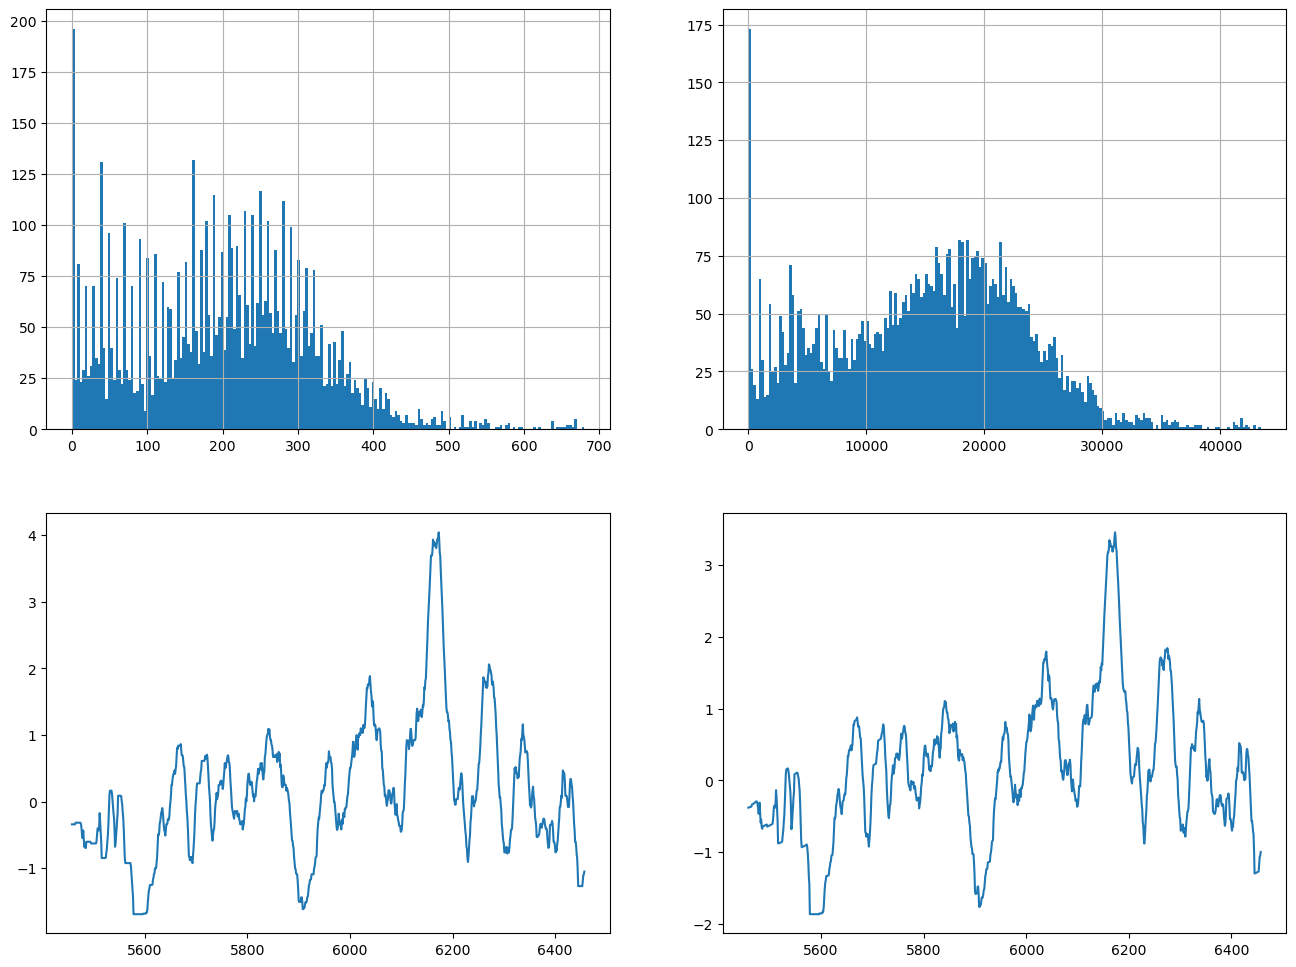

Spectral distribution： DDoS ICMP Flood Attacks


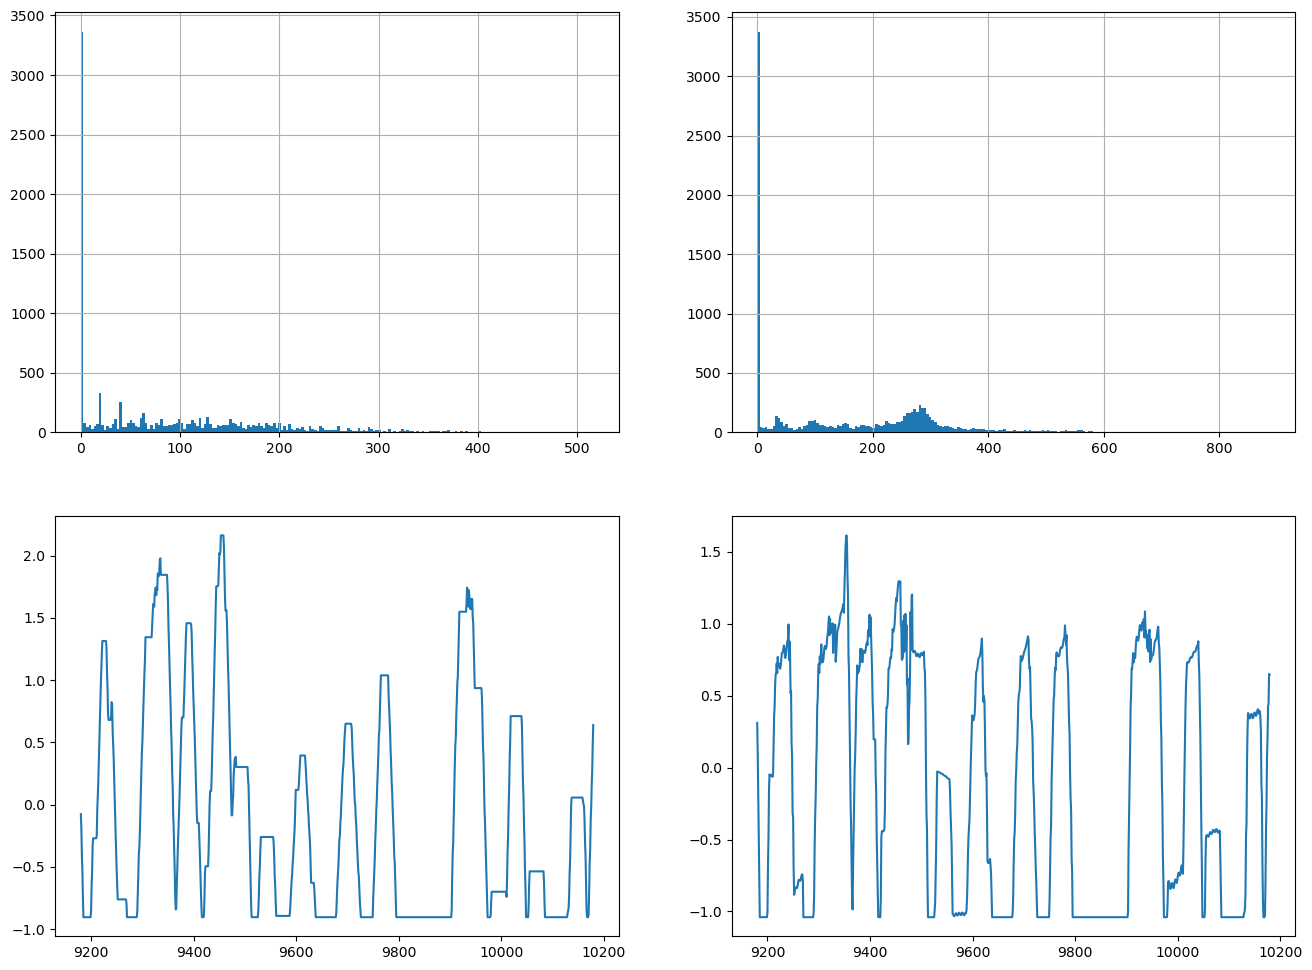

Spectral distribution： DDoS TCP SYN Flood Attacks


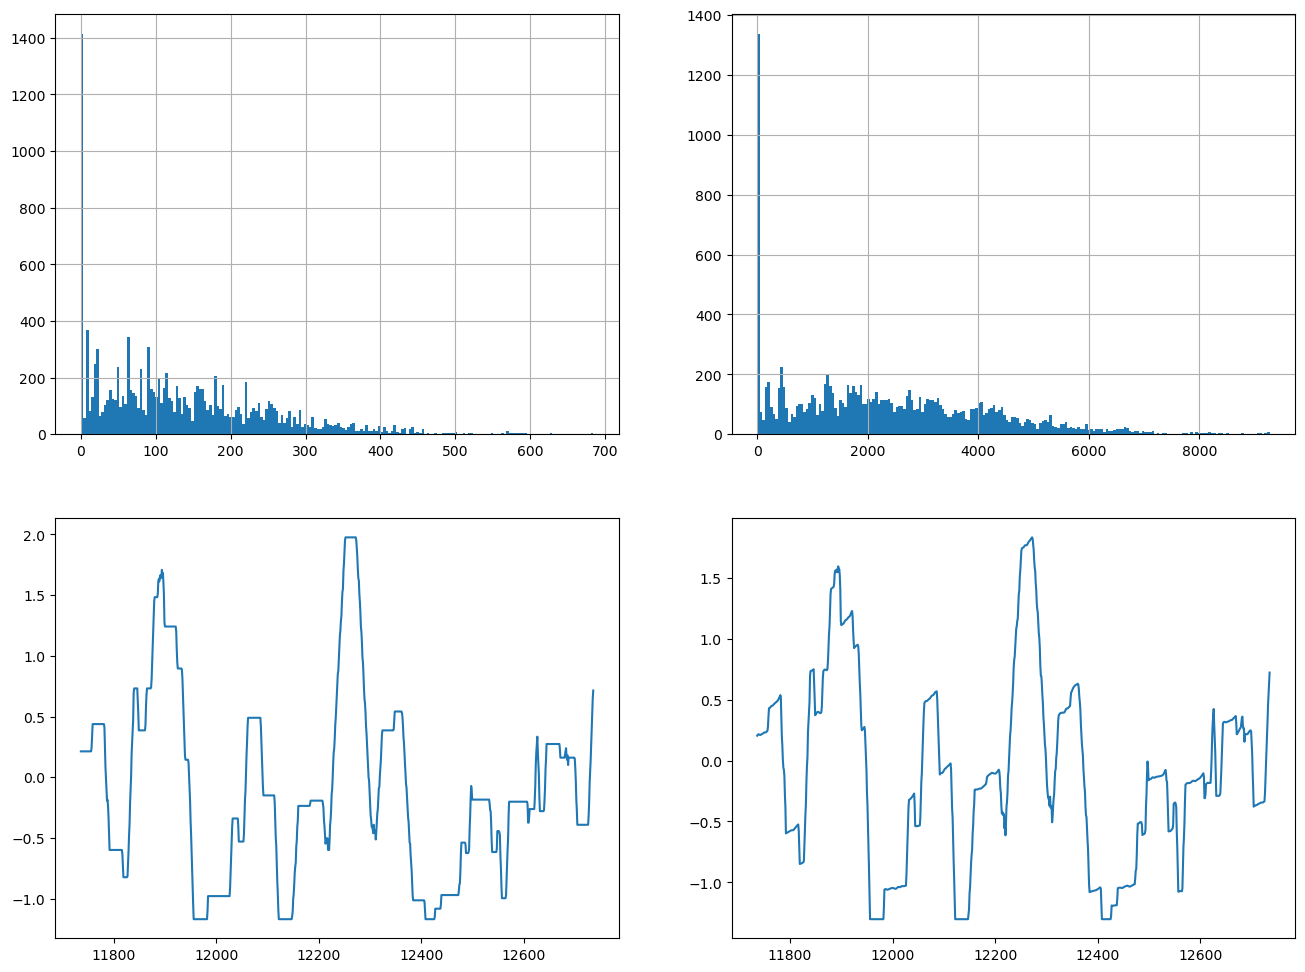

Spectral distribution： Ransomware attack


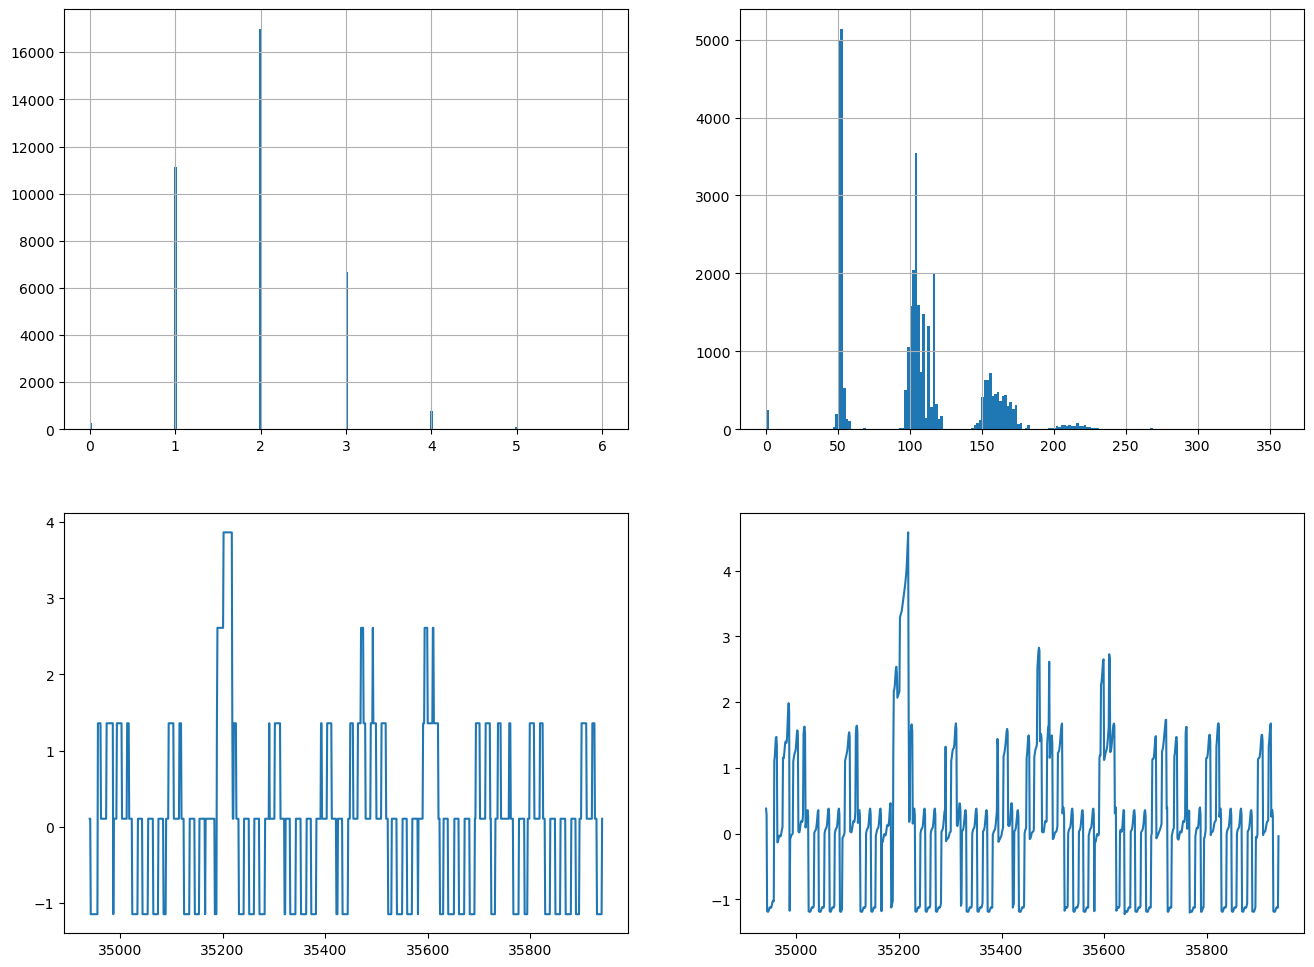

Spectral distribution： DDoS HTTP Flood Attacks


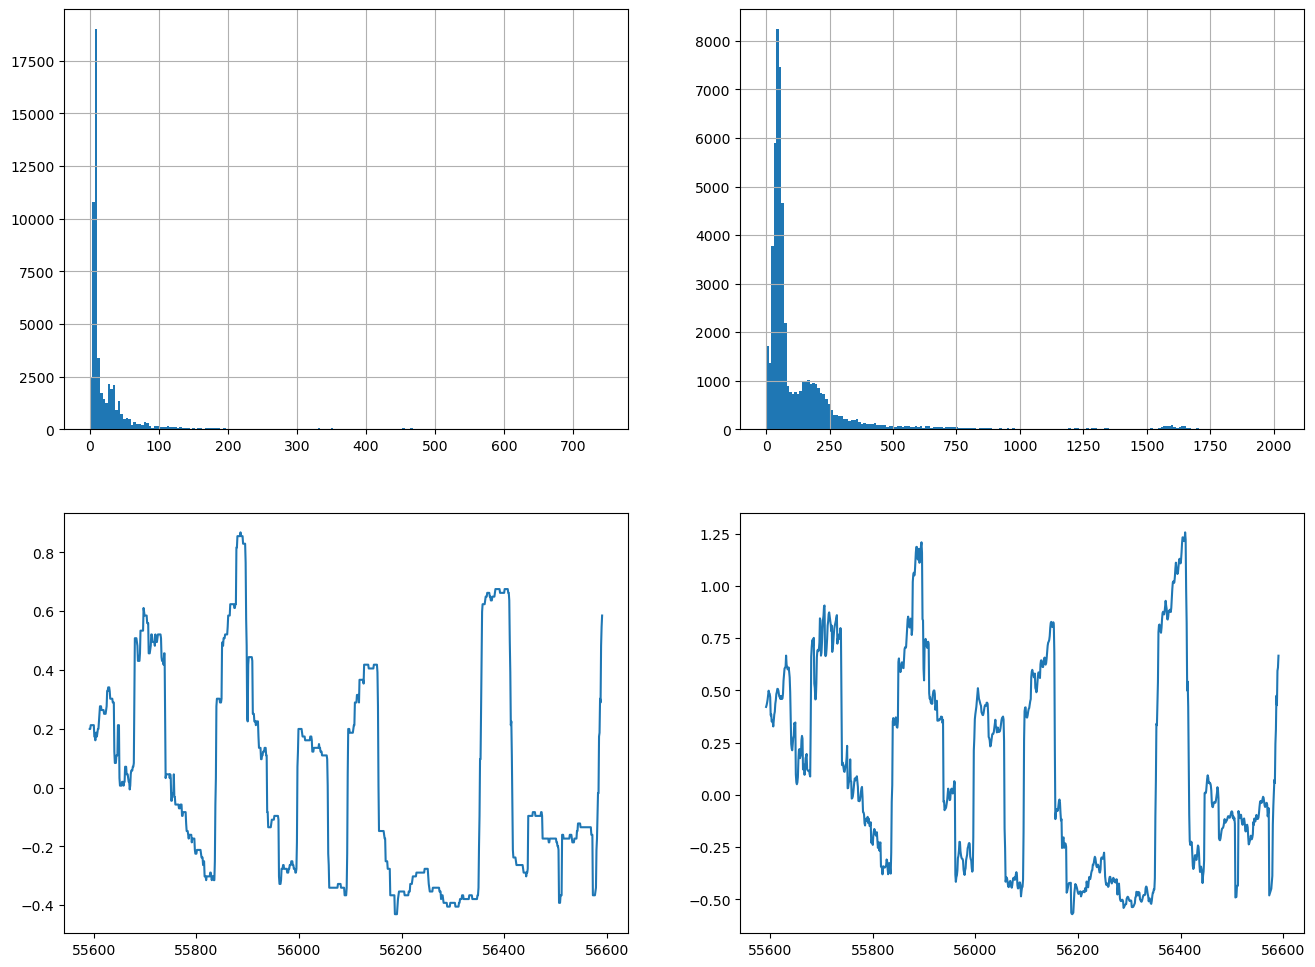

Spectral distribution： Backdoor_attack


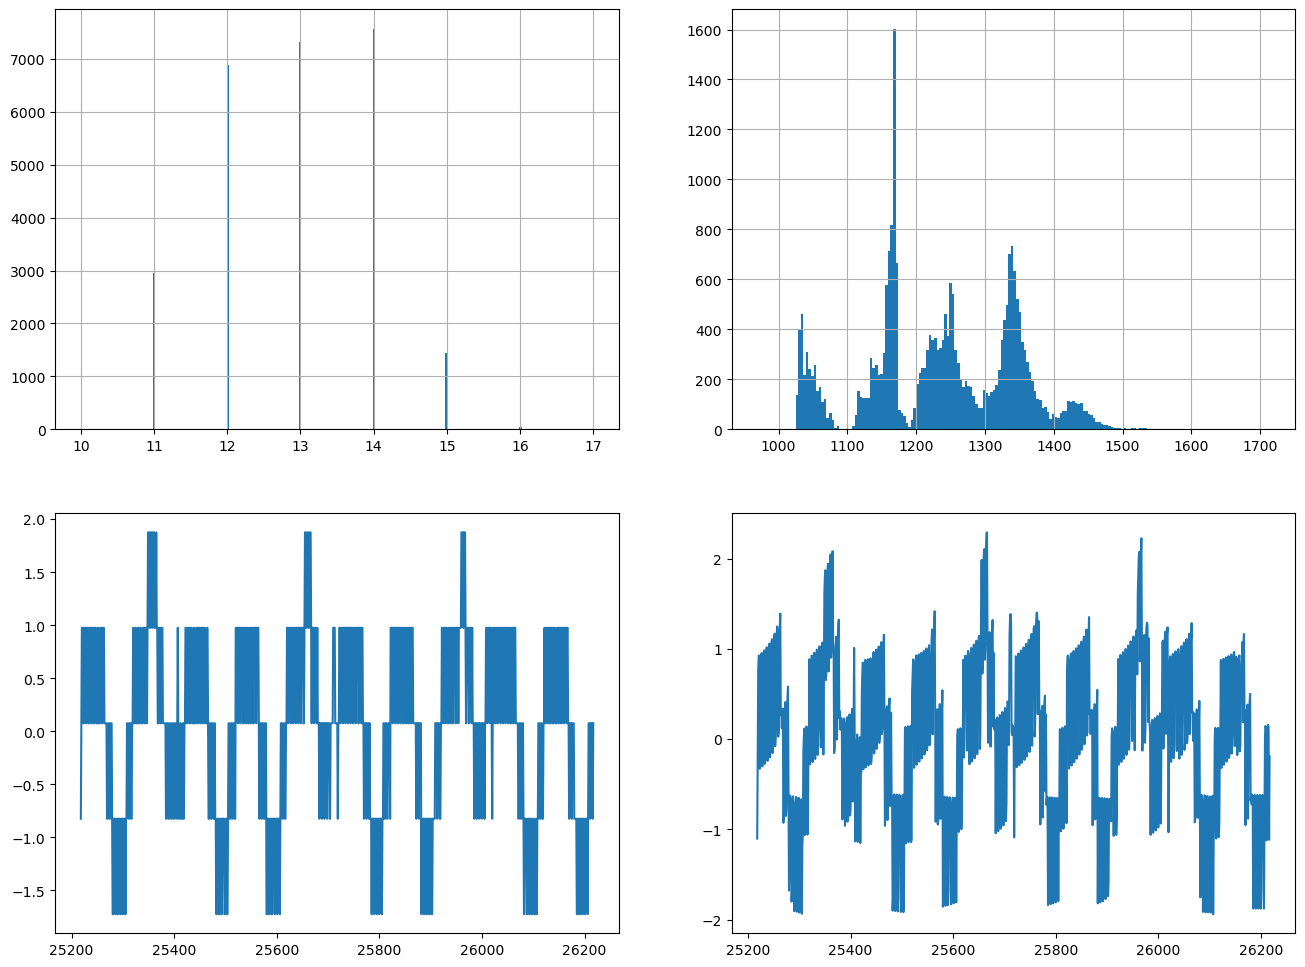

Spectral distribution： MITM (ARP spoofing + DNS) Attack


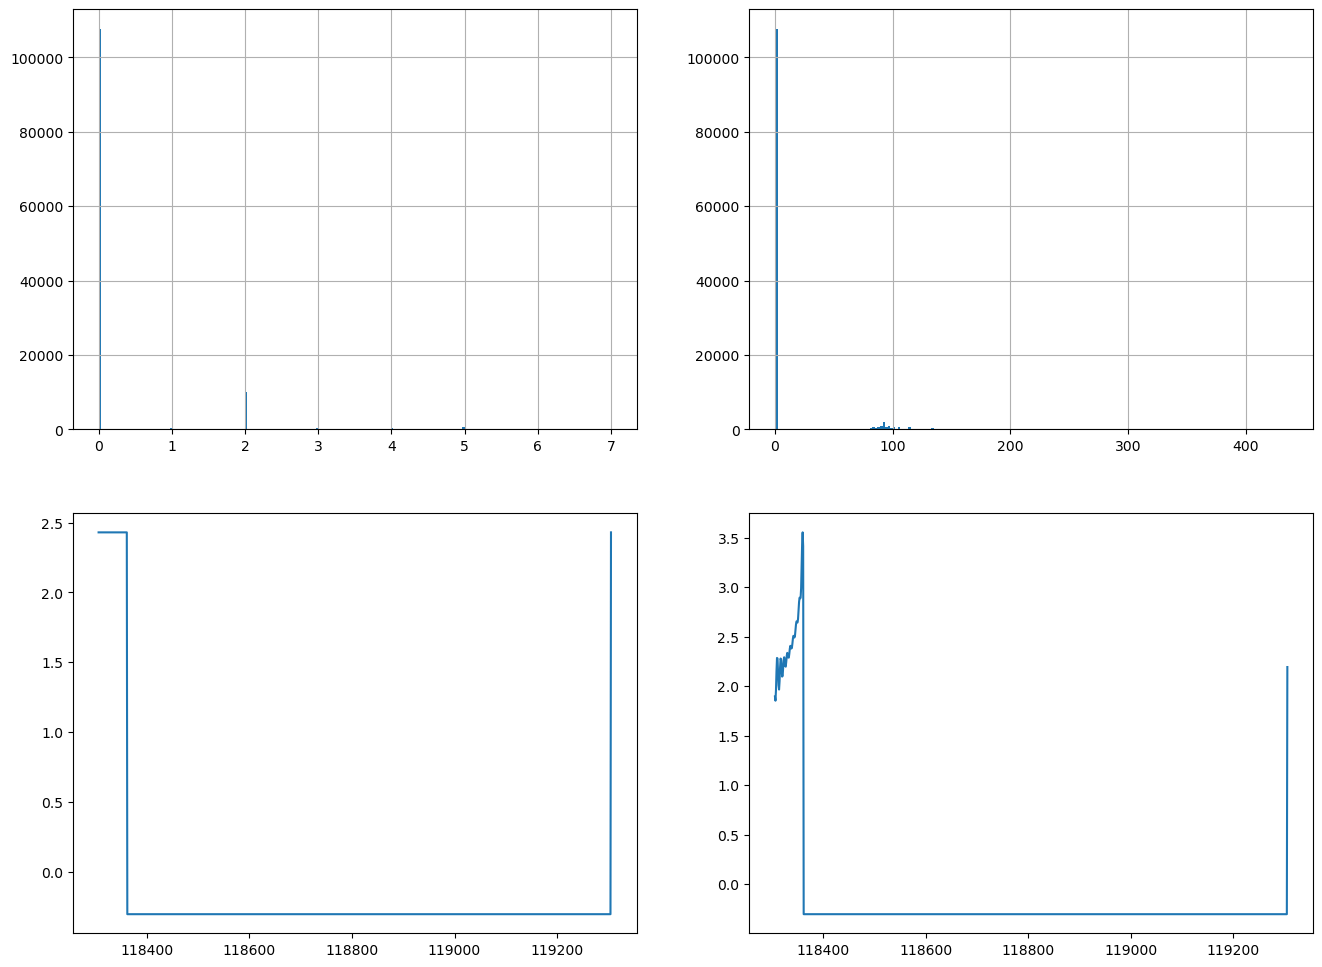

Spectral distribution： SQL injection attack


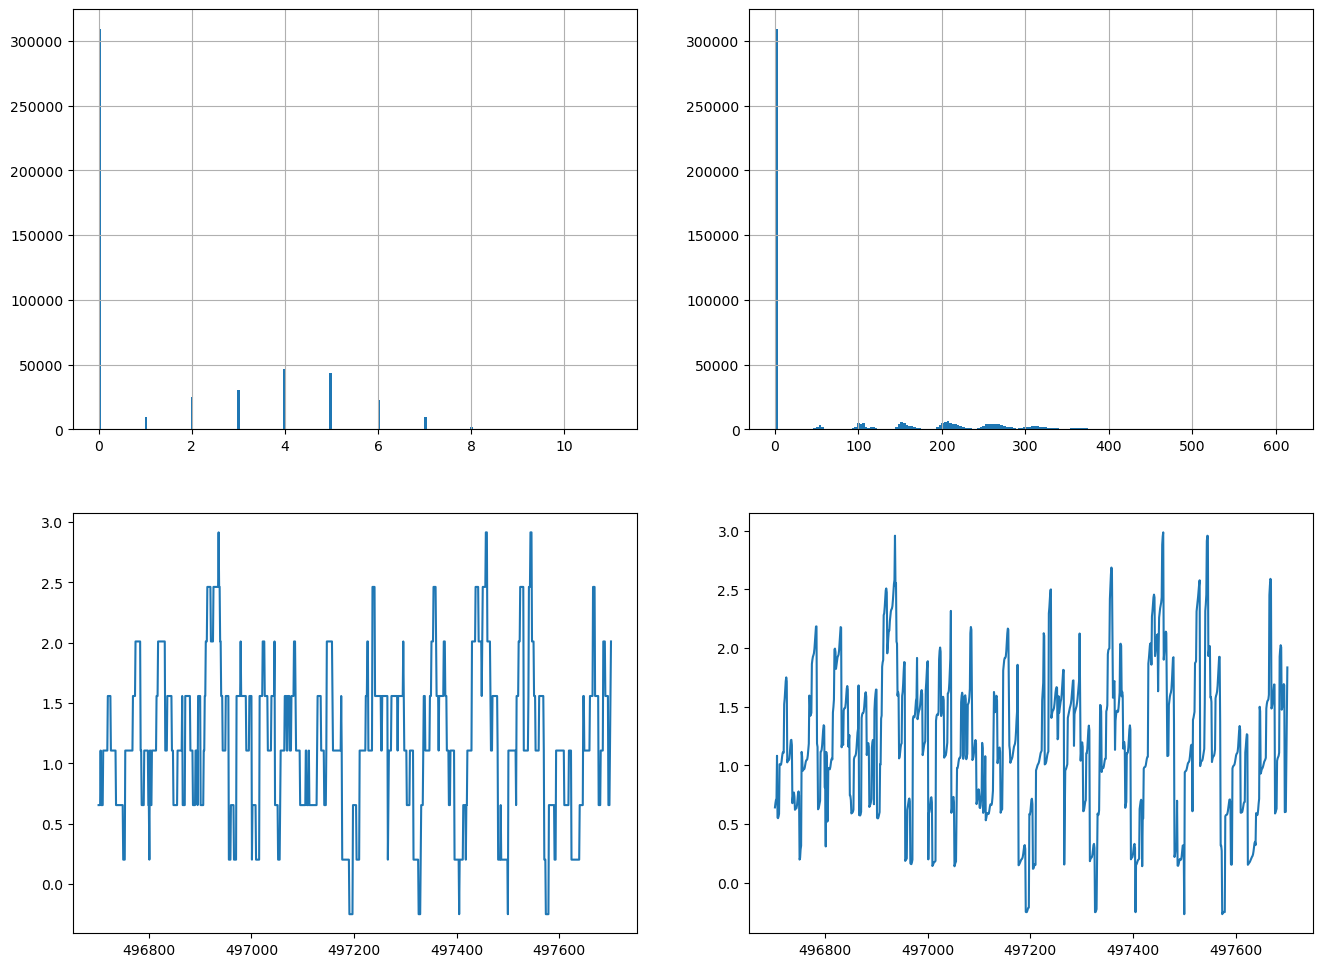

Spectral distribution： XSS attacks


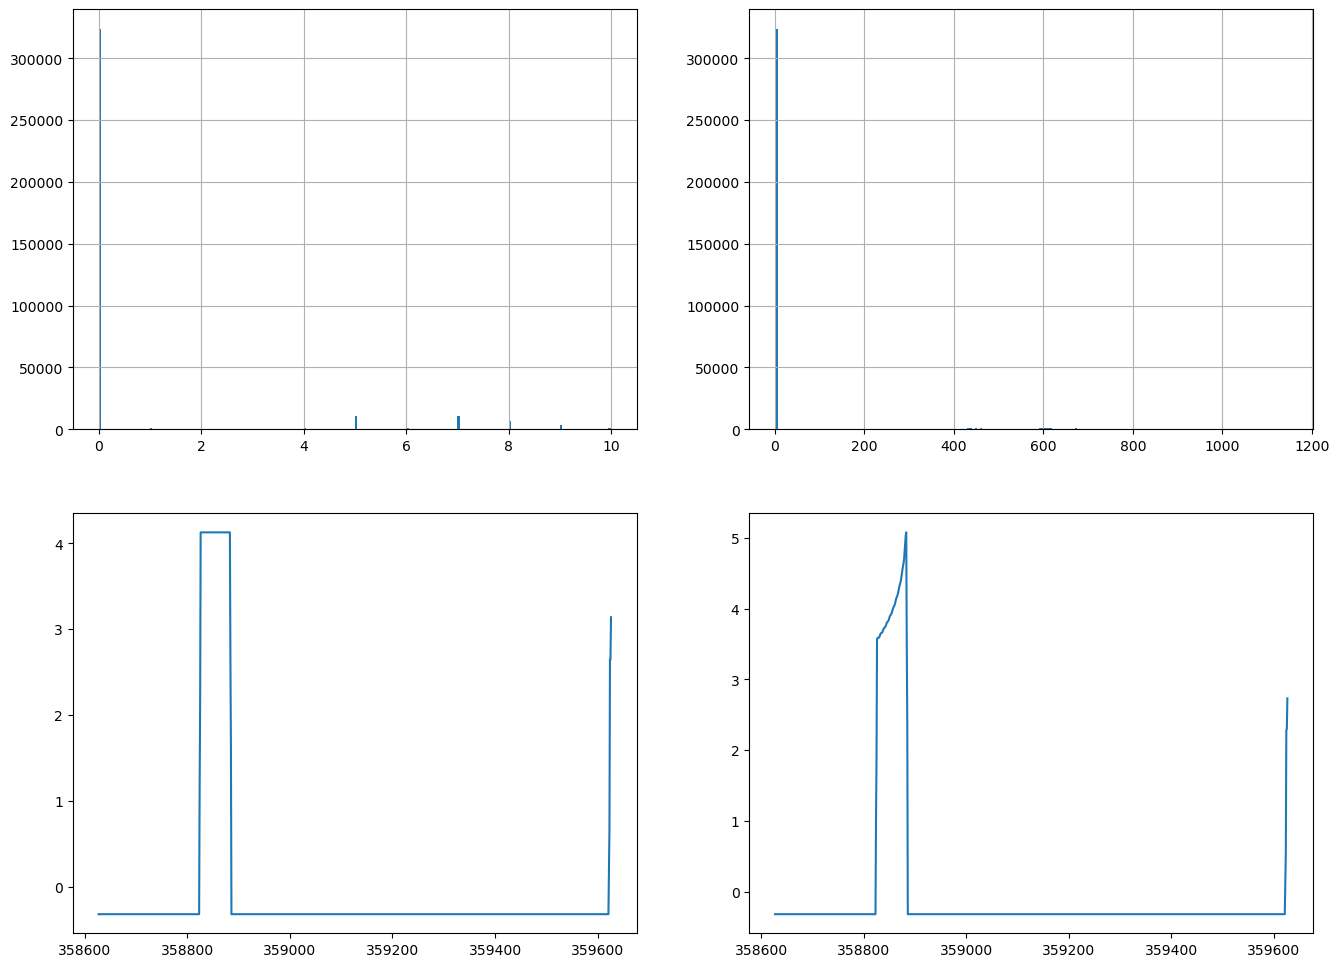

Spectral distribution： OS Fingerprinting attack


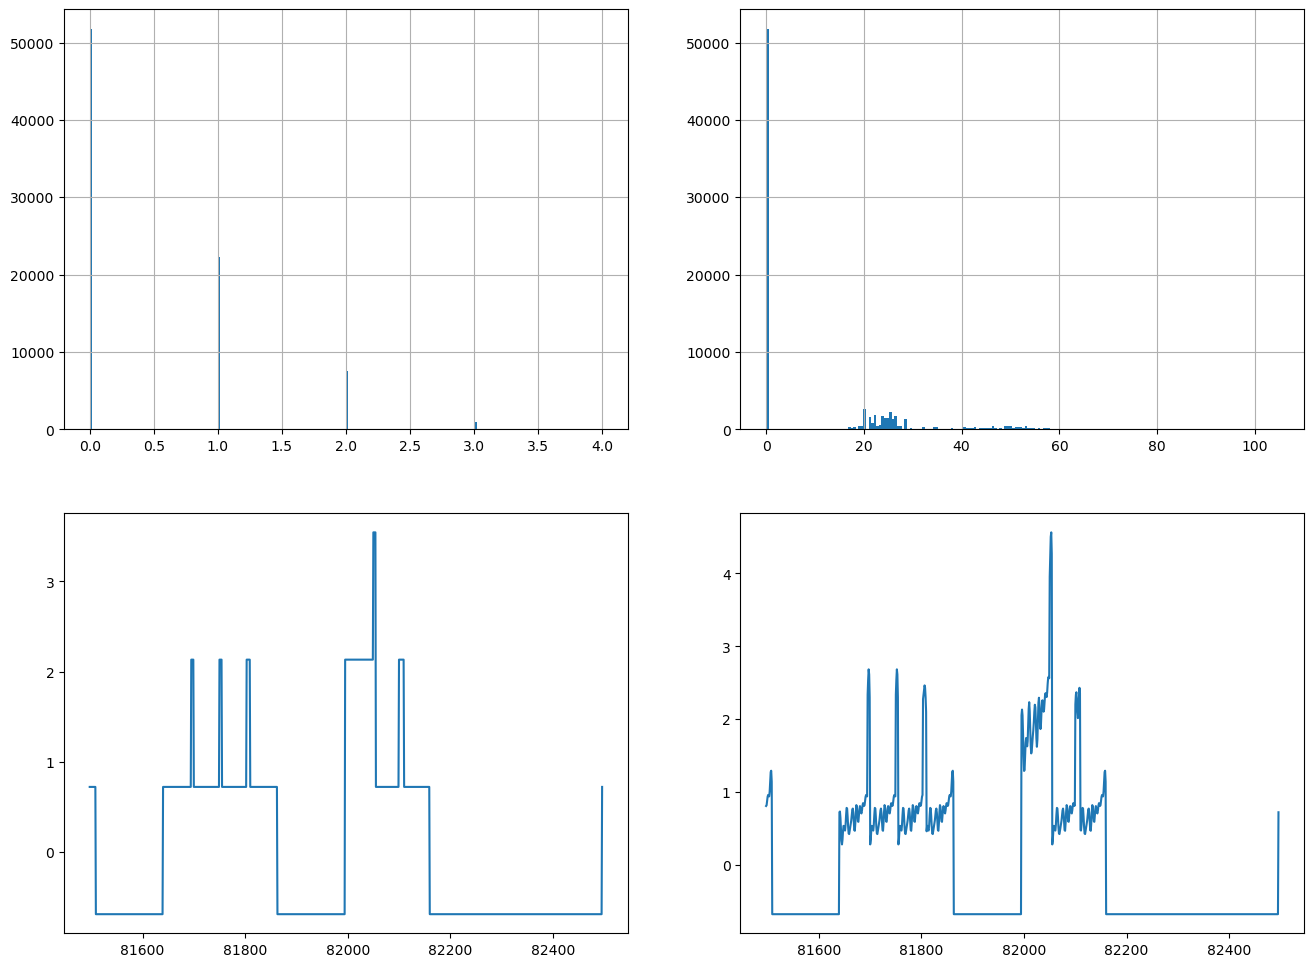

In [7]:
df_temp = pd.read_csv("./IIoTSet/result/spectrums-distribution.csv")
for attack in df_temp['attack'].unique():
    print("Spectral distribution：",attack)
    show_spectrum(attack)

# Total candidate spectral distribution.

In [ ]:
for attack in tqdm(CIoTSample().get_attack_type()):
    ioTScore = CIoTScoreTest(attack)
    df_tmp = ioTScore.get_result()
    df_result = pd.concat([df_result,df_tmp],ignore_index=True)

  0%|          | 0/14 [00:00<?, ?it/s]